In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

Veri Seti

In [2]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

# one-hot encoding
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]

X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
df.shape

(263, 20)

Veri seti hikayesi: Beyzbol oyuncularinin istatistikleri ve maasi

In [13]:
ridge_model = Ridge(alpha = 1).fit(X_train, y_train) # alpha = lambda degeri
ridge_model

Ridge(alpha=15)

In [14]:
ridge_model.coef_

array([ -1.84553577,   8.93594252,   6.80440796,  -3.28191889,
        -1.87755382,   5.38489947,   6.83823874,  -0.12491279,
        -0.2968116 ,  -0.81813646,   1.84354784,   0.81237182,
        -0.66795649,   0.26364253,   0.26281664,  -0.29260205,
        51.64996115, -75.28606517,   2.35401054])

In [15]:
ridge_model.intercept_

-4.286450444520028

In [16]:
np.linspace(10, -2, 100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [17]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5

In [19]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [30]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

In [31]:
katsayilar # her lambda sayisina karsilik 
#degisken sayisi kadar B katsayilari turetildi

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

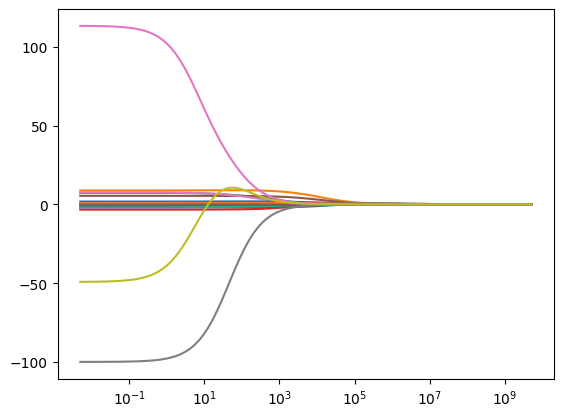

In [32]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")
# x alpha(lambda) y betalar

Ridge Regresyon Tahmin

In [36]:
ridge_model = Ridge().fit(X_train, y_train)
ridge_model

Ridge()

In [37]:
y_pred = ridge_model.predict(X_train)

In [38]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [39]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [40]:
# train hatasi
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [44]:
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

351.3931585606325

In [45]:
# test hatasi
y_pred = ridge_model.predict(X_test)

In [46]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.80829057302424

#### Model Tuning

In [49]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.80829057302424

In [50]:
np.random.randint(0, 1000, 100)

array([175, 470, 973, 987, 580, 980,  78, 827, 421, 605, 432, 360, 186,
       483,  89, 927, 474, 933, 829, 196, 705, 612, 584, 496, 581, 392,
       938, 454, 902, 817,  42, 803, 287, 481, 495, 911, 793, 820, 903,
       478, 892, 208, 377, 601, 145, 916, 879,  67, 248, 588, 414, 438,
       769,  51, 960,  61, 441, 681, 453, 951, 205, 118, 738, 482, 720,
       207, 980, 381, 841, 370, 734, 355, 170, 843,  62, 788, 934, 647,
       273, 244, 536, 574, 263, 506, 983, 675, 735, 104,  95,  45, 320,
       867, 257,  59, 367, 754, 916, 567, 314, 709])

In [51]:
lambdalar1 = np.random.randint(0, 1000, 100)

In [52]:
lambdalar2 = 10**np.linspace(10, -2, 100)*0.5

In [59]:
ridgecv = RidgeCV(alphas = lambdalar2, scoring = "neg_mean_squared_error", 
        cv = 10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [60]:
ridgecv.alpha_

1526927.7544167063

In [61]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [62]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

385.8643856146936

In [63]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", 
        cv = 10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([829, 614, 844,  26, 778, 351, 807, 928, 212, 826, 847, 490, 361,
       733, 798, 549, 599, 751, 214, 861, 596, 698, 617, 830, 761, 690,
        83, 884, 806, 318,  51, 755, 436, 987, 164,  68, 726,  97,   4,
       280, 107, 481, 957, 583, 785, 632, 925, 768, 812, 124, 656, 587,
       696, 511, 914, 781, 363, 909, 413, 227, 243, 476, 878, 581,  83,
       732, 613, 817, 165, 370, 250, 982, 541, 626, 777, 815, 506, 289,
        73, 695,  98, 187, 167, 638, 215,   5, 577, 820, 979, 924, 366,
       864, 704, 758, 482, 987, 708, 462,  50, 312]),
        cv=10, scoring='neg_mean_squared_error')

In [64]:
ridgecv.alpha_

5

In [65]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [66]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.3939170279003